In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from src.models import SIRM, SIRT, SIRV
from src.utils.batch_sweep import sweep_two_parameters

from src.utils.visualization import *
from src.utils.visualization.core import Lx, Ly
import numpy as np

CH = ["#00441b", "#238b45", "#000", "#66c2a4", "#99d8c9"]       # used for fixed homophily
CP = ["#000", "#7f0000", "#d7301f", "#fc8d59", "#fdbb84"]       # used for fixed polarization

In [2]:
NB = 100
NP = 100

homophilic_tendency = {"m": -5, "M": 5, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}


In [4]:
def plot_6_data(M1, T1, V1, M2, T2, V2, mus, taus, xis):
    import matplotlib.pyplot as plt
    
    metrics = ["infections"]
    cmaps = [discretize_cmaps("hot_r", 21)]
    contour_values = [[0.25, 0.5, 0.75]]
    contour_colors = [['#000', '#000', '#000']]
    final_params = {
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }
    
    # M1 figure with rectangle
    F_M_1 = plot_multiple_metrics(
        M1, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    F_M_1 = add_rectangle_to_figure(F_M_1, mus["pol"][0], mus["h"][0], mus["pol"][2], mus["h"][2])
    plt.figure(F_M_1.number)
    plt.show()
    
    # M2 figure with rectangle
    F_M_2 = plot_multiple_metrics(
        M2, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    F_M_2 = add_rectangle_to_figure(F_M_2, mus["pol"][0], mus["h"][0], mus["pol"][2], mus["h"][2])
    plt.figure(F_M_2.number)
    plt.show()
    
    # T1 figure with rectangle
    F_T_1 = plot_multiple_metrics(
        T1, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    F_T_1 = add_rectangle_to_figure(F_T_1, taus["pol"][0], taus["h"][0], taus["pol"][2], taus["h"][2])
    plt.figure(F_T_1.number)
    plt.show()
    
    # T2 figure with rectangle
    F_T_2 = plot_multiple_metrics(
        T2, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    F_T_2 = add_rectangle_to_figure(F_T_2, taus["pol"][0], taus["h"][0], taus["pol"][2], taus["h"][2])
    plt.figure(F_T_2.number)
    plt.show()
    
    # V1 figure with rectangle
    F_V_1 = plot_multiple_metrics(
        V1, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    F_V_1 = add_rectangle_to_figure(F_V_1, xis["pol"][0], xis["h"][0], xis["pol"][2], xis["h"][2])
    plt.figure(F_V_1.number)
    plt.show()
    
    # V2 figure with rectangle
    F_V_2 = plot_multiple_metrics(
        V2, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    F_V_2 = add_rectangle_to_figure(F_V_2, xis["pol"][0], xis["h"][0], xis["pol"][2], xis["h"][2])
    plt.figure(F_V_2.number)
    plt.show()
    
    return F_M_1, F_M_2, F_T_1, F_T_2, F_V_1, F_V_2

In [17]:
def plot_6_data(M1, T1, V1, M2, T2, V2, mus, taus, xis):
    import matplotlib.pyplot as plt
    
    metrics = ["infections"]
    my_hot_r = discretize_cmaps("hot_r", 21)
    my_hot_r.set_bad(color='gray')  # Set the color for masked values to white with 0 alpha

    cmaps = [my_hot_r]
    contour_values = [[0.25, 0.5, 0.75]]
    contour_colors = [['#000', '#000', '#000']]
    final_params = {
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }
    
    # M1 figure with rectangle

    rect_coords = [mus["pol"][0], mus["h"][0], mus["pol"][2]-mus["pol"][0], mus["h"][2]-mus["h"][0]]
    F_M_1 = plot_multiple_metrics(
        M1, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params,
        rect_coords=rect_coords
    )
    
    # M2 figure with rectangle
    F_M_2 = plot_multiple_metrics(
        M2, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params,
        rect_coords=rect_coords
    )
    
    # T1 figure with rectangle

    rect_coords = [taus["pol"][0], taus["h"][0], taus["pol"][2]-taus["pol"][0], taus["h"][2]-taus["h"][0]]
    F_T_1 = plot_multiple_metrics(
        T1, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params,
        rect_coords=rect_coords
    )
    
    # T2 figure with rectangle
    F_T_2 = plot_multiple_metrics(
        T2, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params,
        rect_coords=rect_coords
    )

    # V1 figure with rectangle

    rect_coords = [xis["pol"][0], xis["h"][0], xis["pol"][2]-xis["pol"][0], xis["h"][2]-xis["h"][0]]
    F_V_1 = plot_multiple_metrics(
        V1, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params,
        rect_coords=rect_coords
    )
    F_V_2 = plot_multiple_metrics(
        V2, 
        metrics=metrics,
        cmaps=cmaps, 
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params,
        rect_coords=rect_coords
    )
    return F_M_1, F_M_2, F_T_1, F_T_2, F_V_1, F_V_2

def generate_6_data(N = 25, custom_base_params = None):
    if custom_base_params == None:
        custom_base_params = {
        'beta_M': 0.22,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        'fixed_mean': 0.5,
        # parameters for SIRM
        'mu_max': 0.7,
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/62/6*0.65,      # Set maximum testing rate to 0.5
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max':  0.006      # Set maximum VR to 0.025
    }
    homophilic_tendency = {"m": -5, "M": 5, "n": N}
    pol_range = {"m": 0, "M": 1, "n": N}

    mus = { "mean": [0.76, 0.77, 0.78],
            "pol":  [0.26, 0.28, 0.30],
            "h":    [2.1, 2.5, 3.0]}

    taus = { "mean": [0.45, 0.47, 0.49],
            "pol":  [0.46, 0.48, 0.50],
            "h":    [2.1, 2.4, 2.7]}

    xis = { "mean": [0.59, 0.61, 0.63],
            "pol":  [0.55, 0.57, 0.60],
            "h":    [1.7, 1.9, 2.1]}


    # 0.5
    M_1 = sweep_two_parameters(
        model_module=SIRM,
        param1_name="beta_params",           # parameter 1 name
        param1_range=pol_range,    # parameter 1 range
        param2_name="homophilic_tendency",      # parameter 2 name
        param2_range=homophilic_tendency,         # parameter 2 range
        custom_base_params=custom_base_params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    T_1 = sweep_two_parameters(
        model_module=SIRT,
        param1_name="beta_params",           # parameter 1 name
        param1_range=pol_range,    # parameter 1 range
        param2_name="homophilic_tendency",      # parameter 2 name
        param2_range=homophilic_tendency,         # parameter 2 range
        custom_base_params=custom_base_params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    V_1 = sweep_two_parameters(
        model_module=SIRV,
        param1_name="beta_params",           # parameter 1 name
        param1_range=pol_range,    # parameter 1 range
        param2_name="homophilic_tendency",      # parameter 2 name
        param2_range=homophilic_tendency,         # parameter 2 range
        custom_base_params=custom_base_params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    #Diff_mean
    custom_base_params["fixed_mean"] = mus["mean"][1]
    M_2 = sweep_two_parameters(
            model_module=SIRM,
            param1_name="beta_params",           # parameter 1 name
            param1_range=pol_range,    # parameter 1 range
            param2_name="homophilic_tendency",      # parameter 2 name
            param2_range=homophilic_tendency,         # parameter 2 range
            custom_base_params=custom_base_params,
            simulated_days=1000,
            population_size=5,
            batch_size=1000
    )
    custom_base_params["fixed_mean"] = taus["mean"][1]
    T_2 = sweep_two_parameters(
            model_module=SIRT,
            param1_name="beta_params",           # parameter 1 name
            param1_range=pol_range,    # parameter 1 range
            param2_name="homophilic_tendency",      # parameter 2 name
            param2_range=homophilic_tendency,         # parameter 2 range
            custom_base_params=custom_base_params,
            simulated_days=1000,
            population_size=5,
            batch_size=1000
    )
    custom_base_params["fixed_mean"] = xis["mean"][1]
    V_2 = sweep_two_parameters(
            model_module=SIRV,
            param1_name="beta_params",           # parameter 1 name
            param1_range=pol_range,    # parameter 1 range
            param2_name="homophilic_tendency",      # parameter 2 name
            param2_range=homophilic_tendency,         # parameter 2 range
            custom_base_params=custom_base_params,
            simulated_days=1000,
            population_size=5,
            batch_size=1000
    )
    plot_6_data(M_1, T_1, V_1, M_2, T_2, V_2, mus, taus, xis)
    return M_1, T_1, V_1, M_2, T_2, V_2


In [29]:
0.9*8/12

0.6

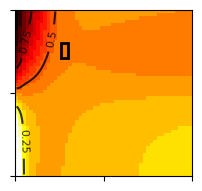

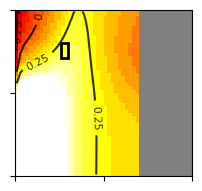

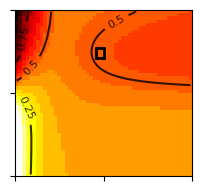

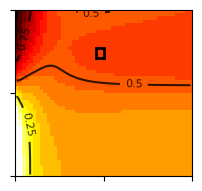

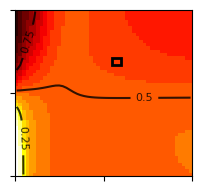

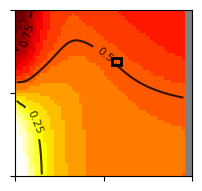

In [36]:
PARAMS = {
        'beta_M': 0.40,
        'recovery_rate': 0.2,
        'dT': 0.5,
        'SPB_exponent': 1,
        'fixed_mean': 0.5,
        # parameters for SIRM
        'mu_max': 0.9*9/12,            # 90% effective, and wore mask 8 hours a day, in a 12 hours day (public)
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,              # Set minimum testing rate to 0
        'testing_rate_max': 2/7*0.95,        # Set maximum testing rate 2 per week, 0.9 effective
        # parameters for SIRV
        'vaccination_rate_min': 0,          # Set minimum VR to 0
        'vaccination_rate_max':  0.01       # Set maximum VR to 0.025
    }

M1, T1, V1, M2, T2, V2 = generate_6_data(N = 50, custom_base_params= PARAMS)


In [49]:
NB = 100
NP = 100

homophilic_tendency = {"m": -5, "M": 5, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}
custom_base_params = {
        'beta_M': 0.22,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        'fixed_mean': 0.5,
        # parameters for SIRM
        'mu_max': 0.7,
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/62/6*0.65,      # Set maximum testing rate to 0.5
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max':  0.006      # Set maximum VR to 0.025
    }

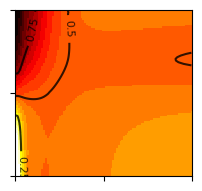

In [50]:
results_MASKS = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }
fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

In [ ]:
results_TESTS = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
fig_3 = plot_multiple_metrics(
    results_TESTS,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params)

In [ ]:
results_VACCINATION = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
fig_4 = plot_multiple_metrics(
    results_VACCINATION,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

In [ ]:
mus = { "mean": [0.76, 0.77, 0.78],
        "pol":  [0.26, 0.28, 0.30],
        "h":    [2.1, 2.5, 3.0]}

taus = { "mean": [0.45, 0.47, 0.49],
        "pol":  [0.46, 0.48, 0.50],
        "h":    [2.1, 2.4, 2.7]}

xis = { "mean": [0.59, 0.61, 0.63],
        "pol":  [0.55, 0.57, 0.60],
        "h":    [1.7, 1.9, 2.1]}

In [ ]:
VAR = mus
custom_base_params["fixed_mean"] = VAR["mean"][1]

results_MASKS = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }
fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

In [ ]:
VAR = taus
custom_base_params["fixed_mean"] = VAR["mean"][1]

results_MASKS = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

In [ ]:
VAR = xis
custom_base_params["fixed_mean"] = VAR["mean"][1]

results_MASKS = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

In [16]:
def generate_figure_matrix(
    mus, 
    taus, 
    xis, 
    pol_range={"m": 0, "M": 1, "n": 100},
    homophilic_tendency={"m": -5, "M": 5, "n": 100},
    custom_params=None,
    simulated_days=1000,
    population_size=5,
    batch_size=1000,
    figsize=(15, 12),
    dpi=100,
    save_path=None
):
    """
    Generate all six figures for the SIRM, SIRT, and SIRV models arranged in a 3x2 matrix.
    
    Layout:
    [SIRM with mean=0.5] [SIRM with mean=mus["mean"][1]]
    [SIRT with mean=0.5] [SIRT with mean=taus["mean"][1]]
    [SIRV with mean=0.5] [SIRV with mean=xis["mean"][1]]
    
    Args:
        mus, taus, xis: Dictionaries with "mean", "pol", and "h" parameters from survey
        pol_range: Range for polarization parameter
        homophilic_tendency: Range for homophilic tendency parameter
        custom_params: Base parameters for the models (if None, default parameters will be used)
        simulated_days: Number of days to simulate
        population_size: Number of population compartments
        batch_size: Batch size for processing parameter combinations
        figsize: Size of the figure in inches (width, height)
        dpi: Resolution of the figure
        save_path: If provided, the figure will be saved to this path
        
    Returns:
        The figure object
    """
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from src.models import SIRM, SIRT, SIRV
    from src.utils.batch_sweep import sweep_two_parameters
    from src.utils.visualization import plot_multiple_metrics, discretize_cmaps
    from src.utils.visualization.core import Lx, Ly
    import numpy as np
    import matplotlib
    
    # Set default parameters if not provided
    if custom_params is None:
        custom_params = {
            'beta_M': 0.22,
            'recovery_rate': 0.1,
            'dT': 1,
            'SPB_exponent': 1,
            'fixed_mean': 0.5,
            # parameters for SIRM
            'mu_max': 0.7,
            'mu_min': 0,
            # parameters for SIRT
            'testing_rate_min': 0,
            'testing_rate_max': 1/62/6*0.65,
            # parameters for SIRV
            'vaccination_rate_min': 0,
            'vaccination_rate_max': 0.006
        }
    
    # Visualization settings
    metrics = ["infections"]
    cmaps = [discretize_cmaps("hot_r", 21)]
    contour_values = [[0.25, 0.5, 0.75]]
    contour_colors = [['#000', '#000', '#000']]
    final_params = {
        'Lx': Lx,
        'Ly': Ly,
        'xticks': [0, 0.5, 1],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }
    
    # Create figure with GridSpec
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = gridspec.GridSpec(3, 2, figure=fig)
    
    # Models to use in each row
    models = [SIRM, SIRT, SIRV]
    
    # Labels for model types
    model_labels = ["SIRM (Masks)", "SIRT (Testing)", "SIRV (Vaccination)"]
    
    # Mean values for each column
    model_mean_values = [
        [0.5, mus["mean"][1]],  # For SIRM
        [0.5, taus["mean"][1]], # For SIRT
        [0.5, xis["mean"][1]]   # For SIRV
    ]
    
    # Store original plt.show function and temporarily override it
    original_show = plt.show
    plt.show = lambda: None
    
    # Create each subfigure
    for row, (model, model_label, mean_values) in enumerate(zip(models, model_labels, model_mean_values)):
        for col, mean_value in enumerate(mean_values):
            # Set the mean value for this simulation
            params = custom_params.copy()
            params['fixed_mean'] = mean_value
            
            # Run the simulation
            results = sweep_two_parameters(
                model_module=model,
                param1_name="beta_params",
                param1_range=pol_range,
                param2_name="homophilic_tendency",
                param2_range=homophilic_tendency,
                custom_base_params=params,
                simulated_days=simulated_days,
                population_size=population_size,
                batch_size=batch_size
            )
            
            # Create an axis for this subplot
            ax = fig.add_subplot(gs[row, col])
            
            # Create temporary figure for plotting
            temp_fig = plt.figure(figsize=(Lx, Ly))
            temp_ax = temp_fig.add_subplot(111)
            
            # Make the current axis the temporary one for plotting
            plt.sca(temp_ax)
            
            # Plot metrics on the temporary figure
            subfig = plot_multiple_metrics(
                results,
                metrics=metrics,
                cmaps=cmaps,
                contour_values=contour_values,
                contour_colors=contour_colors,
                final_params=final_params
            )
            
            # Transfer contents from temp figure to main figure's axis
            temp_ax = subfig.axes[0]  # Get the axis from the returned figure
            
            # Transfer images (heatmaps)
            for image in temp_ax.images:
                ax.imshow(image.get_array(), extent=image.get_extent(),
                         cmap=image.get_cmap(), norm=image.norm,
                         origin=image.origin, alpha=image.get_alpha())
            
            # Transfer contour lines
            for collection in temp_ax.collections:
                if isinstance(collection, matplotlib.collections.LineCollection):
                    ax.add_collection(collection.copy())
            
            # Set the same limits and ticks
            ax.set_xlim(final_params['xlim'])
            ax.set_ylim(final_params['ylim'])
            ax.set_xticks(final_params['xticks'])
            ax.set_yticks(final_params['yticks'])
            
            # Set labels only on the outer axes
            if row == 2:
                ax.set_xlabel('Polarization')
            if col == 0:
                ax.set_ylabel('Homophilic Tendency')
            
            # Set title for each subplot
            mean_label = f"μ = {mean_value:.2f}"
            ax.set_title(f"{model_label} ({mean_label})")
            
            # Close the temporary figure to free memory
            plt.close(subfig)
            plt.close(temp_fig)
    
    # Restore original plt.show function
    plt.show = original_show
    
    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Save figure if path is provided
    if save_path:
        fig.savefig(save_path, dpi=dpi, bbox_inches="tight")
    
    return fig



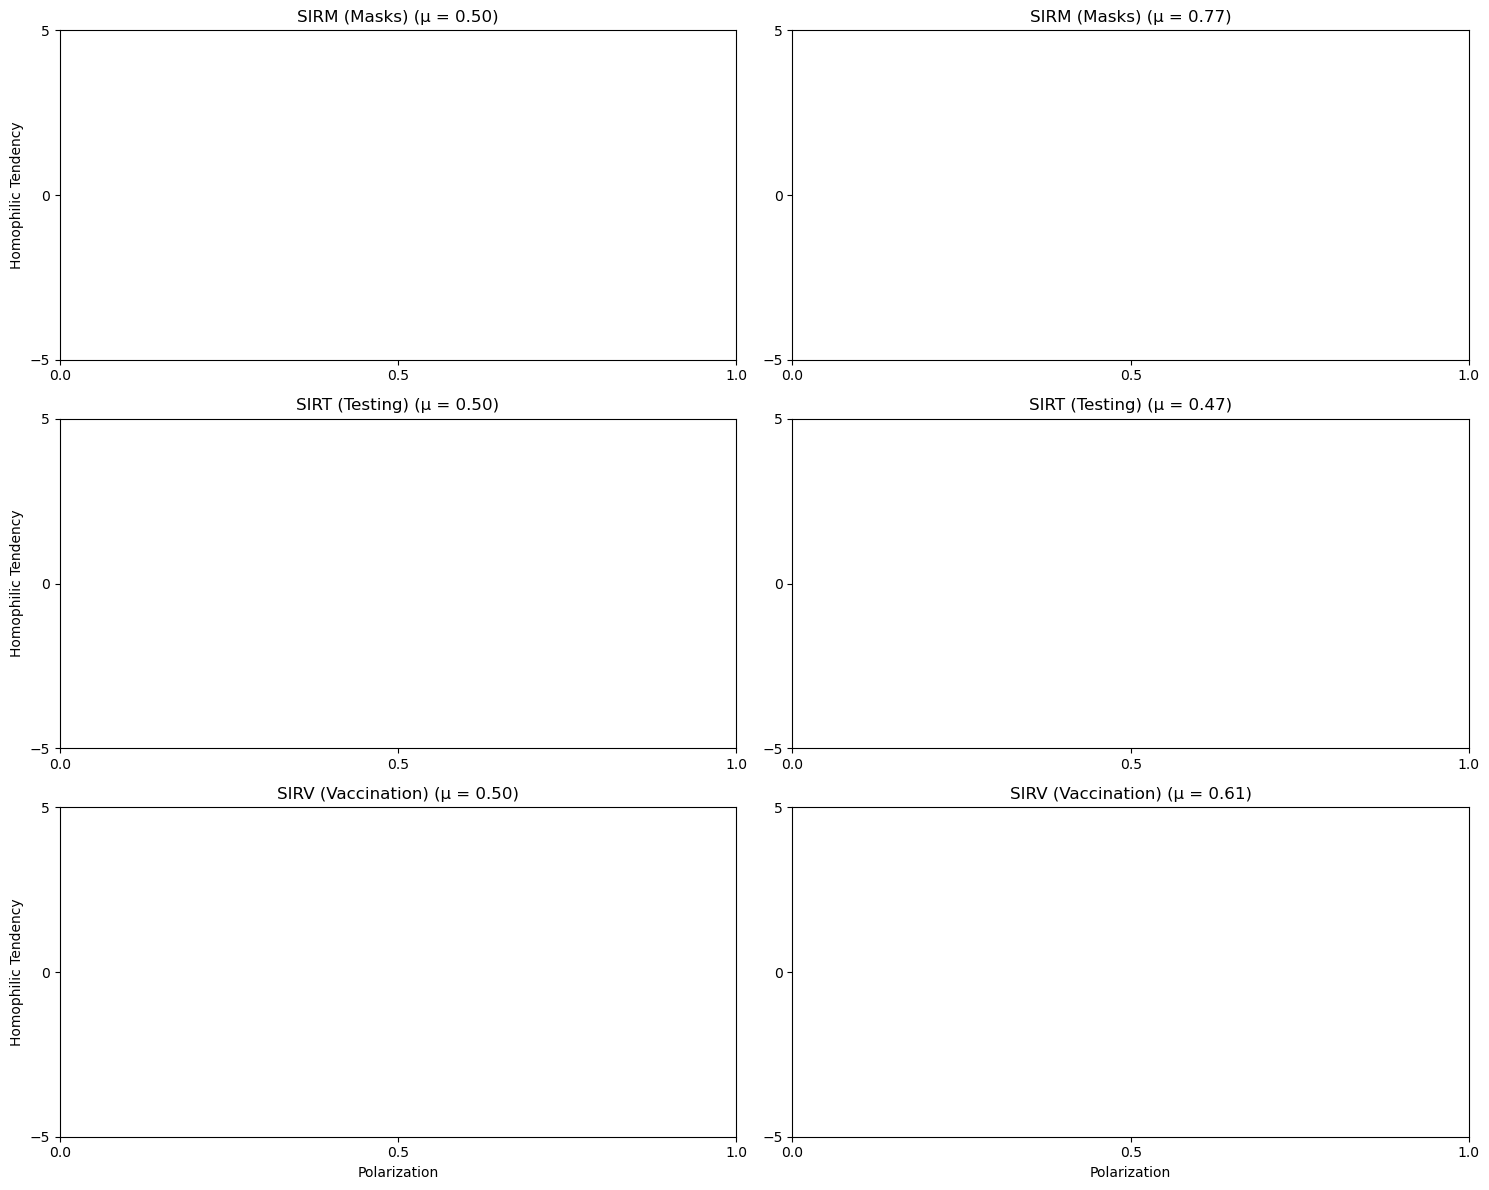

In [17]:

# Define survey parameters
mus = {"mean": [0.76, 0.77, 0.78], "pol": [0.26, 0.28, 0.30], "h": [2.1, 2.5, 3.0]}
taus = {"mean": [0.45, 0.47, 0.49], "pol": [0.46, 0.48, 0.50], "h": [2.1, 2.4, 2.7]}
xis = {"mean": [0.59, 0.61, 0.63], "pol": [0.55, 0.57, 0.60], "h": [1.7, 1.9, 2.1]}

# Generate the figure matrix
fig = generate_figure_matrix(
    mus=mus,
    taus=taus,
    xis=xis,
    pol_range={"m": 0, "M": 1, "n": 25},
    homophilic_tendency={"m": -5, "M": 5, "n": 25},
    save_path="epidemic_models_matrix.png"
)

# Display the figure
plt.show()

In [20]:
def quick_figure_matrix(mus, taus, xis, custom_params=None):
    """
    Simple function that runs simulations and directly uses the figures returned by plot_multiple_metrics.
    Just for debugging purposes.
    """
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from src.models import SIRM, SIRT, SIRV
    from src.utils.batch_sweep import sweep_two_parameters
    from src.utils.visualization import plot_multiple_metrics, discretize_cmaps
    from src.utils.visualization.core import Lx, Ly
    
    # Set default parameters if not provided
    if custom_params is None:
        custom_params = {
            'beta_M': 0.22,
            'recovery_rate': 0.1,
            'dT': 1,
            'SPB_exponent': 1,
            'fixed_mean': 0.5,
            # parameters for SIRM
            'mu_max': 0.7,
            'mu_min': 0,
            # parameters for SIRT
            'testing_rate_min': 0,
            'testing_rate_max': 1/62/6*0.65,
            # parameters for SIRV
            'vaccination_rate_min': 0,
            'vaccination_rate_max': 0.006
        }
    
    # Simulation parameters
    pol_range = {"m": 0, "M": 1, "n": 25}
    homophilic_tendency = {"m": -5, "M": 5, "n": 25}
    
    # Visualization settings
    metrics = ["infections"]
    cmaps = [discretize_cmaps("hot_r", 21)]
    contour_values = [[0.25, 0.5, 0.75]]
    contour_colors = [['#000', '#000', '#000']]
    final_params = {
        'Lx': Lx,
        'Ly': Ly,
        'xticks': [0, 0.5, 1],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }
    
    # Just run simulations and display figures directly
    
    # 1. SIRM with default mean
    params = custom_params.copy()
    params['fixed_mean'] = 0.5
    results = sweep_two_parameters(
        model_module=SIRM,
        param1_name="beta_params",
        param1_range=pol_range,
        param2_name="homophilic_tendency",
        param2_range=homophilic_tendency,
        custom_base_params=params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    fig1 = plot_multiple_metrics(
        results,
        metrics=metrics,
        cmaps=cmaps,
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    fig1.suptitle("SIRM (Masks) (μ = 0.50)")
    fig1.savefig("fig1_sirm_default.png")
    
    # 2. SIRM with survey mean
    params = custom_params.copy()
    params['fixed_mean'] = mus["mean"][1]
    results = sweep_two_parameters(
        model_module=SIRM,
        param1_name="beta_params",
        param1_range=pol_range,
        param2_name="homophilic_tendency",
        param2_range=homophilic_tendency,
        custom_base_params=params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    fig2 = plot_multiple_metrics(
        results,
        metrics=metrics,
        cmaps=cmaps,
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    fig2.suptitle(f"SIRM (Masks) (μ = {mus['mean'][1]:.2f})")
    fig2.savefig("fig2_sirm_survey.png")
    
    # 3. SIRT with default mean
    params = custom_params.copy()
    params['fixed_mean'] = 0.5
    results = sweep_two_parameters(
        model_module=SIRT,
        param1_name="beta_params",
        param1_range=pol_range,
        param2_name="homophilic_tendency",
        param2_range=homophilic_tendency,
        custom_base_params=params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    fig3 = plot_multiple_metrics(
        results,
        metrics=metrics,
        cmaps=cmaps,
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    fig3.suptitle("SIRT (Testing) (μ = 0.50)")
    fig3.savefig("fig3_sirt_default.png")
    
    # 4. SIRT with survey mean
    params = custom_params.copy()
    params['fixed_mean'] = taus["mean"][1]
    results = sweep_two_parameters(
        model_module=SIRT,
        param1_name="beta_params",
        param1_range=pol_range,
        param2_name="homophilic_tendency",
        param2_range=homophilic_tendency,
        custom_base_params=params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    fig4 = plot_multiple_metrics(
        results,
        metrics=metrics,
        cmaps=cmaps,
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    fig4.suptitle(f"SIRT (Testing) (μ = {taus['mean'][1]:.2f})")
    fig4.savefig("fig4_sirt_survey.png")
    
    # 5. SIRV with default mean
    params = custom_params.copy()
    params['fixed_mean'] = 0.5
    results = sweep_two_parameters(
        model_module=SIRV,
        param1_name="beta_params",
        param1_range=pol_range,
        param2_name="homophilic_tendency",
        param2_range=homophilic_tendency,
        custom_base_params=params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    fig5 = plot_multiple_metrics(
        results,
        metrics=metrics,
        cmaps=cmaps,
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    fig5.suptitle("SIRV (Vaccination) (μ = 0.50)")
    fig5.savefig("fig5_sirv_default.png")
    
    # 6. SIRV with survey mean
    params = custom_params.copy()
    params['fixed_mean'] = xis["mean"][1]
    results = sweep_two_parameters(
        model_module=SIRV,
        param1_name="beta_params",
        param1_range=pol_range,
        param2_name="homophilic_tendency",
        param2_range=homophilic_tendency,
        custom_base_params=params,
        simulated_days=1000,
        population_size=5,
        batch_size=1000
    )
    fig6 = plot_multiple_metrics(
        results,
        metrics=metrics,
        cmaps=cmaps,
        contour_values=contour_values,
        contour_colors=contour_colors,
        final_params=final_params
    )
    fig6.suptitle(f"SIRV (Vaccination) (μ = {xis['mean'][1]:.2f})")
    fig6.savefig("fig6_sirv_survey.png")
    
    print("All figures saved individually. View them separately since they're just for debugging.")
    
    return [fig1, fig2, fig3, fig4, fig5, fig6]

In [23]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

def arrange_figures_in_grid(figures):
    """
    Arrange 6 matplotlib figures in a 3×2 grid layout.
    
    Parameters:
    -----------
    figures : list
        A list of 6 matplotlib Figure objects
    
    Returns:
    --------
    matplotlib.figure.Figure
        The combined figure with all subplots arranged in a 3×2 grid
    """
    # Create a new figure to hold everything
    main_fig = plt.figure(figsize=(15, 12))
    
    # Define the grid positions for each figure
    positions = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
    
    # Add each figure to the grid
    for i, fig in enumerate(figures):
        if i >= 6:
            break
            
        row, col = positions[i]
        
        # Create a subplot for this position
        ax = main_fig.add_subplot(3, 2, i+1)
        
        # Get the original figure's axes
        orig_ax = fig.get_axes()[0]  # Assumes each figure has one axis
        
        # Transfer content from original figure to this subplot
        for line in orig_ax.lines:
            ax.add_line(line.copy())
        for collection in orig_ax.collections:
            ax.add_collection(collection.copy())
        for patch in orig_ax.patches:
            ax.add_patch(patch.copy())
            
        # Copy axis properties
        ax.set_xlim(orig_ax.get_xlim())
        ax.set_ylim(orig_ax.get_ylim())
        ax.set_title(orig_ax.get_title())
        ax.set_xlabel(orig_ax.get_xlabel())
        ax.set_ylabel(orig_ax.get_ylabel())
        
    main_fig.tight_layout()
    return main_fig

All figures saved individually. View them separately since they're just for debugging.


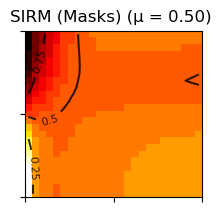

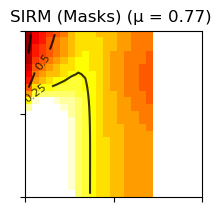

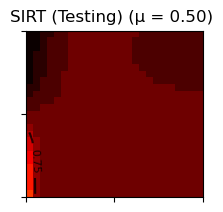

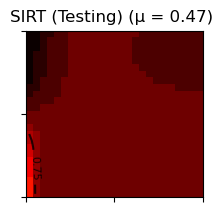

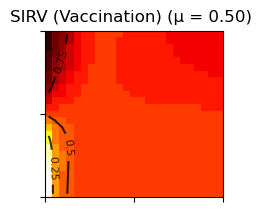

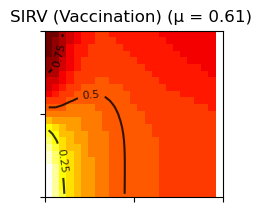

In [ ]:
# Define survey parameters


# Run the quick and dirty function
figures = quick_figure_matrix(mus, taus, xis)

